<a href="https://colab.research.google.com/github/ark1st/2020_AI/blob/master/midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

주어진 Train data 25,000 개를 15,000개의 partial train data와 10,000개의 partial test data로 나누어 새로 만드시오.

15,000개의 partial train data를 사용하여 3-fold cross validation 결과를 보이시오.

15,000개의 partial train data 와 10,000개의 partial test data를 사용하여  overfitting을 최소로 하는 신경망 모델을 케라스로 프로그램하고 그래프 등을 사용하여 결과를 보여주고 그에 대해 분석 설명 하시오(강의 내용 범주 안에서 구현하시오).
여기서 사용되는 test dataset은 원본 25,000 Test dataset으로 test 하시오.

제출 기한 : 2020. 6.1(월) 
제출 방법 : 사이버 캠퍼스 9주차 중간고사 레포트 제출로 제출
제출 양식: 레포트 제출 양식을 사용하나 자율적으로 작성해도 무방 


In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [0]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [34]:
train_data.shape, test_data.shape

((25000,), (25000,))

In [0]:
X_train = train_data[:15000]
X_val = train_data[15000:]
y_train = train_labels[:15000]
y_val = train_labels[15000:]

In [0]:
def Vectorize_Sequence(sequences, dimension = 10000):
    result = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        result[i, sequence] = 1
    return result

X_train = Vectorize_Sequence(X_train)
X_val = Vectorize_Sequence(X_val)
X_test = Vectorize_Sequence(test_data)

In [0]:
y_train = np.asarray(y_train).astype('float32')
y_val = np.asarray(y_val).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Model 

In [0]:
from keras import models
from keras import layers
def create_Model():
    model = models.Sequential()
    model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
              
    model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    
    return model

In [39]:
len(train_data)

25000

### 3-fold Validation

In [40]:
k = 3
num_val_samples = len(X_train) // k
acc_list = []
val_acc_list = []
loss_list = []
val_loss_list = []
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate(
        [X_train[:i * num_val_samples],
         X_train[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
         y_train[(i + 1) * num_val_samples:]],
        axis=0)
    
    model = create_Model()
    
    history = model.fit(partial_train_data,
                    partial_train_targets,
                    epochs=7,
                    batch_size=256,
                    validation_data=(val_data, val_targets),
                    verbose = 0)
    
    print("accuracy: %.2f%%" % (history.history['accuracy'][-1]))
    print("loss: %.2f%%" % (history.history['loss'][-1]))
    print("val_accuracy: %.2f%%" %  (history.history['val_accuracy'][-1]))
    print("val_loss: %.2f%%" % (history.history['val_loss'][-1]))

    acc_list.append(history.history['accuracy'][-1])
    loss_list.append(history.history['loss'][-1])
    val_acc_list.append(history.history['val_accuracy'][-1])
    val_loss_list.append(history.history['val_loss'][-1])

print("%.2f (+/- %.2f%%)" % (np.mean(acc_list), np.std(acc_list)))
print("%.2f (+/- %.2f%%)" % (np.mean(loss_list), np.std(loss_list)))
print("%.2f (+/- %.2f%%)" % (np.mean(val_acc_list), np.std(val_acc_list)))
print("%.2f (+/- %.2f%%)" % (np.mean(val_loss_list), np.std(val_loss_list)))

처리중인 폴드 # 0
accuracy: 0.98%
loss: 0.06%
val_accuracy: 0.87%
val_loss: 0.37%
처리중인 폴드 # 1
accuracy: 0.99%
loss: 0.06%
val_accuracy: 0.87%
val_loss: 0.37%
처리중인 폴드 # 2
accuracy: 0.98%
loss: 0.07%
val_accuracy: 0.87%
val_loss: 0.38%
0.99 (+/- 0.00%)
0.06 (+/- 0.00%)
0.87 (+/- 0.00%)
0.37 (+/- 0.00%)


# 2번 문제

In [0]:
from keras import backend as K 
from keras import regularizers
from keras.optimizers import rmsprop
opt = rmsprop()
K.clear_session()
#기저모델
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [42]:
history_dict = {}

history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=256,
                    validation_data=(X_val, y_val))
history_dict = history.history

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 2s 130us/step - loss: 0.4494 - accuracy: 0.8265 - val_loss: 0.3217 - val_accuracy: 0.8814
Epoch 2/10
15000/15000 [==============================] - 2s 121us/step - loss: 0.2449 - accuracy: 0.9151 - val_loss: 0.2767 - val_accuracy: 0.8892
Epoch 3/10
15000/15000 [==============================] - 2s 123us/step - loss: 0.1763 - accuracy: 0.9391 - val_loss: 0.2941 - val_accuracy: 0.8840
Epoch 4/10
15000/15000 [==============================] - 2s 124us/step - loss: 0.1358 - accuracy: 0.9555 - val_loss: 0.3289 - val_accuracy: 0.8779
Epoch 5/10
15000/15000 [==============================] - 2s 127us/step - loss: 0.1057 - accuracy: 0.9640 - val_loss: 0.3254 - val_accuracy: 0.8809
Epoch 6/10
15000/15000 [==============================] - 2s 125us/step - loss: 0.0832 - accuracy: 0.9741 - val_loss: 0.4310 - val_accuracy: 0.8663
Epoch 7/10
15000/15000 [==============================] - 2s 1

In [0]:
history_df = pd.DataFrame(history_dict)


0.88919997215271


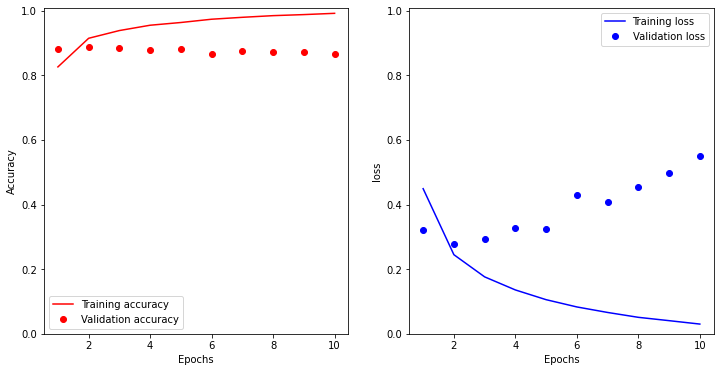

In [44]:
accuracy = history_df['accuracy']   
val_accuracy = history_df['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'ro', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0,1.01)
plt.legend()

plt.subplot(1,2,2)
loss = history_df['loss']   
val_loss = history_df['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.ylim(0,1.01)
plt.legend()
print(max(val_accuracy))

In [45]:
model.evaluate(X_test, y_test)

25000/25000 [==============================] - 2s 62us/step


[0.6253738464927673, 0.8454399704933167]

### 1) L1, L2 정규화 추가

In [46]:
K.clear_session()
opt = rmsprop()
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,), kernel_regularizer=regularizers.l1(0.001)))
model.add(layers.Dense(16, activation='relu',))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_dict = {}
history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=256,
                    validation_data=(X_val, y_val))
history_dict = history.history
L1_df = pd.DataFrame(history_dict)

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 2s 129us/step - loss: 0.8585 - accuracy: 0.7581 - val_loss: 0.6225 - val_accuracy: 0.8460
Epoch 2/10
15000/15000 [==============================] - 2s 121us/step - loss: 0.5809 - accuracy: 0.8497 - val_loss: 0.5774 - val_accuracy: 0.8377
Epoch 3/10
15000/15000 [==============================] - 2s 119us/step - loss: 0.5355 - accuracy: 0.8609 - val_loss: 0.5249 - val_accuracy: 0.8639
Epoch 4/10
15000/15000 [==============================] - 2s 119us/step - loss: 0.5142 - accuracy: 0.8668 - val_loss: 0.5175 - val_accuracy: 0.8642
Epoch 5/10
15000/15000 [==============================] - 2s 116us/step - loss: 0.5006 - accuracy: 0.8695 - val_loss: 0.5177 - val_accuracy: 0.8595
Epoch 6/10
15000/15000 [==============================] - 2s 117us/step - loss: 0.4926 - accuracy: 0.8753 - val_loss: 0.5011 - val_accuracy: 0.8692
Epoch 7/10
15000/15000 [==============================] - 2s 1

In [47]:
K.clear_session()
opt = rmsprop()
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,), kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(16, activation='relu',))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_dict = {}
history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=256,
                    validation_data=(X_val, y_val))
history_dict = history.history
L2_df = pd.DataFrame(history_dict)

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 2s 125us/step - loss: 0.4718 - accuracy: 0.8169 - val_loss: 0.3516 - val_accuracy: 0.8811
Epoch 2/10
15000/15000 [==============================] - 2s 117us/step - loss: 0.2794 - accuracy: 0.9114 - val_loss: 0.3066 - val_accuracy: 0.8921
Epoch 3/10
15000/15000 [==============================] - 2s 116us/step - loss: 0.2319 - accuracy: 0.9292 - val_loss: 0.3102 - val_accuracy: 0.8903
Epoch 4/10
15000/15000 [==============================] - 2s 114us/step - loss: 0.2057 - accuracy: 0.9401 - val_loss: 0.3222 - val_accuracy: 0.8852
Epoch 5/10
15000/15000 [==============================] - 2s 115us/step - loss: 0.1895 - accuracy: 0.9479 - val_loss: 0.3435 - val_accuracy: 0.8821
Epoch 6/10
15000/15000 [==============================] - 2s 116us/step - loss: 0.1785 - accuracy: 0.9522 - val_loss: 0.3554 - val_accuracy: 0.8810
Epoch 7/10
15000/15000 [==============================] - 2s 1

In [48]:
K.clear_session()
opt = rmsprop()
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,), kernel_regularizer=regularizers.l1_l2(0.001)))
model.add(layers.Dense(16, activation='relu',))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_dict = {}
history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=256,
                    validation_data=(X_val, y_val))
history_dict = history.history
L1l2_input_df = pd.DataFrame(history_dict)

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 2s 125us/step - loss: 0.8763 - accuracy: 0.7761 - val_loss: 0.6424 - val_accuracy: 0.8302
Epoch 2/10
15000/15000 [==============================] - 2s 118us/step - loss: 0.6061 - accuracy: 0.8364 - val_loss: 0.5840 - val_accuracy: 0.8540
Epoch 3/10
15000/15000 [==============================] - 2s 118us/step - loss: 0.5712 - accuracy: 0.8504 - val_loss: 0.5723 - val_accuracy: 0.8548
Epoch 4/10
15000/15000 [==============================] - 2s 116us/step - loss: 0.5581 - accuracy: 0.8524 - val_loss: 0.5825 - val_accuracy: 0.8356
Epoch 5/10
15000/15000 [==============================] - 2s 120us/step - loss: 0.5455 - accuracy: 0.8599 - val_loss: 0.5459 - val_accuracy: 0.8535
Epoch 6/10
15000/15000 [==============================] - 2s 118us/step - loss: 0.5400 - accuracy: 0.8603 - val_loss: 0.5323 - val_accuracy: 0.8653
Epoch 7/10
15000/15000 [==============================] - 2s 1

In [49]:
K.clear_session()
opt = rmsprop()
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_dict = {}
history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=256,
                    validation_data=(X_val, y_val))
history_dict = history.history
L1_hidden_df = pd.DataFrame(history_dict)

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 2s 120us/step - loss: 0.5299 - accuracy: 0.8105 - val_loss: 0.3856 - val_accuracy: 0.8769
Epoch 2/10
15000/15000 [==============================] - 2s 112us/step - loss: 0.3012 - accuracy: 0.9127 - val_loss: 0.3497 - val_accuracy: 0.8784
Epoch 3/10
15000/15000 [==============================] - 2s 112us/step - loss: 0.2215 - accuracy: 0.9409 - val_loss: 0.3380 - val_accuracy: 0.8847
Epoch 4/10
15000/15000 [==============================] - 2s 114us/step - loss: 0.1767 - accuracy: 0.9535 - val_loss: 0.3349 - val_accuracy: 0.8852
Epoch 5/10
15000/15000 [==============================] - 2s 113us/step - loss: 0.1478 - accuracy: 0.9649 - val_loss: 0.3567 - val_accuracy: 0.8824
Epoch 6/10
15000/15000 [==============================] - 2s 114us/step - loss: 0.1224 - accuracy: 0.9753 - val_loss: 0.3850 - val_accuracy: 0.8790
Epoch 7/10
15000/15000 [==============================] - 2s 1

In [50]:
K.clear_session()
opt = rmsprop()
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_dict = {}
history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=256,
                    validation_data=(X_val, y_val))
history_dict = history.history
L2_hidden_df = pd.DataFrame(history_dict)

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 2s 119us/step - loss: 0.4796 - accuracy: 0.8217 - val_loss: 0.3477 - val_accuracy: 0.8803
Epoch 2/10
15000/15000 [==============================] - 2s 113us/step - loss: 0.2684 - accuracy: 0.9124 - val_loss: 0.2916 - val_accuracy: 0.8907
Epoch 3/10
15000/15000 [==============================] - 2s 114us/step - loss: 0.1977 - accuracy: 0.9364 - val_loss: 0.3008 - val_accuracy: 0.8863
Epoch 4/10
15000/15000 [==============================] - 2s 111us/step - loss: 0.1560 - accuracy: 0.9528 - val_loss: 0.3137 - val_accuracy: 0.8848
Epoch 5/10
15000/15000 [==============================] - 2s 113us/step - loss: 0.1278 - accuracy: 0.9643 - val_loss: 0.3484 - val_accuracy: 0.8788
Epoch 6/10
15000/15000 [==============================] - 2s 114us/step - loss: 0.1034 - accuracy: 0.9731 - val_loss: 0.3774 - val_accuracy: 0.8772
Epoch 7/10
15000/15000 [==============================] - 2s 1

In [31]:
K.clear_session()
opt = rmsprop()
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l1_l2(0.001)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_dict = {}
history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=256,
                    validation_data=(X_val, y_val))
history_dict = history.history
L2_hidden_df = pd.DataFrame(history_dict)

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 4s 271us/step - loss: 0.6761 - accuracy: 0.8157 - val_loss: 0.5354 - val_accuracy: 0.8598
Epoch 2/10
15000/15000 [==============================] - 2s 106us/step - loss: 0.4211 - accuracy: 0.9111 - val_loss: 0.4189 - val_accuracy: 0.8920
Epoch 3/10
15000/15000 [==============================] - 2s 105us/step - loss: 0.3190 - accuracy: 0.9347 - val_loss: 0.3812 - val_accuracy: 0.8908
Epoch 4/10
15000/15000 [==============================] - 2s 105us/step - loss: 0.2578 - accuracy: 0.9480 - val_loss: 0.3711 - val_accuracy: 0.8872
Epoch 5/10
15000/15000 [==============================] - 2s 105us/step - loss: 0.2132 - accuracy: 0.9586 - val_loss: 0.3625 - val_accuracy: 0.8858
Epoch 6/10
15000/15000 [==============================] - 2s 108us/step - loss: 0.1815 - accuracy: 0.9654 - val_loss: 0.3837 - val_accuracy: 0.8792
Epoch 7/10
15000/15000 [==============================] - 2s 1

### 2) dropout layer

In [51]:
K.clear_session()
opt = rmsprop()
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_dict = {}
history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=256,
                    validation_data=(X_val, y_val))
history_dict = history.history
dropout_df = pd.DataFrame(history_dict)

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 2s 122us/step - loss: 0.4933 - accuracy: 0.7990 - val_loss: 0.3573 - val_accuracy: 0.8712
Epoch 2/10
15000/15000 [==============================] - 2s 114us/step - loss: 0.2912 - accuracy: 0.9009 - val_loss: 0.2971 - val_accuracy: 0.8866
Epoch 3/10
15000/15000 [==============================] - 2s 113us/step - loss: 0.2199 - accuracy: 0.9278 - val_loss: 0.2924 - val_accuracy: 0.8902
Epoch 4/10
15000/15000 [==============================] - 2s 115us/step - loss: 0.1707 - accuracy: 0.9455 - val_loss: 0.3015 - val_accuracy: 0.8895
Epoch 5/10
15000/15000 [==============================] - 2s 117us/step - loss: 0.1361 - accuracy: 0.9587 - val_loss: 0.3377 - val_accuracy: 0.8858
Epoch 6/10
15000/15000 [==============================] - 2s 115us/step - loss: 0.1098 - accuracy: 0.9687 - val_loss: 0.3653 - val_accuracy: 0.8832
Epoch 7/10
15000/15000 [==============================] - 2s 1

### 3) 학습률(learning late)과 epoch 수정

In [59]:
K.clear_session()
opt = rmsprop(lr=0.0001)
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_dict = {}
history = model.fit(X_train,
                    y_train,
                    epochs=22,
                    batch_size=256,
                    validation_data=(X_val, y_val))
history_dict = history.history
lr_epoch_df = pd.DataFrame(history_dict)

Train on 15000 samples, validate on 10000 samples
Epoch 1/22
15000/15000 [==============================] - 2s 124us/step - loss: 0.6962 - accuracy: 0.5597 - val_loss: 0.6763 - val_accuracy: 0.6447
Epoch 2/22
15000/15000 [==============================] - 2s 113us/step - loss: 0.6538 - accuracy: 0.6697 - val_loss: 0.6250 - val_accuracy: 0.7402
Epoch 3/22
15000/15000 [==============================] - 2s 114us/step - loss: 0.6058 - accuracy: 0.7374 - val_loss: 0.5759 - val_accuracy: 0.8134
Epoch 4/22
15000/15000 [==============================] - 2s 114us/step - loss: 0.5594 - accuracy: 0.7879 - val_loss: 0.5289 - val_accuracy: 0.8335
Epoch 5/22
15000/15000 [==============================] - 2s 114us/step - loss: 0.5152 - accuracy: 0.8211 - val_loss: 0.4869 - val_accuracy: 0.8494
Epoch 6/22
15000/15000 [==============================] - 2s 114us/step - loss: 0.4787 - accuracy: 0.8369 - val_loss: 0.4526 - val_accuracy: 0.8615
Epoch 7/22
15000/15000 [==============================] - 2s 1

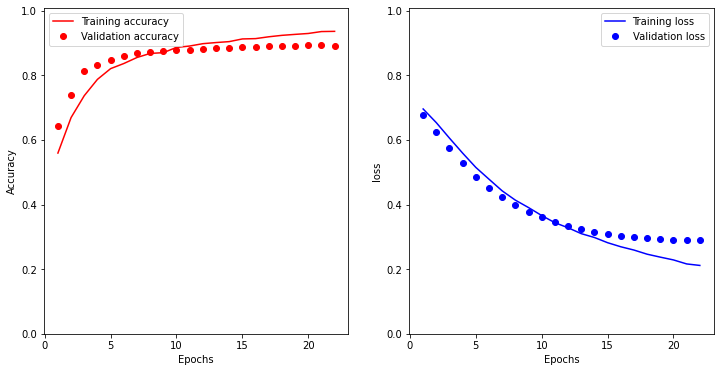

In [60]:
accuracy = lr_epoch_df['accuracy']   
val_accuracy = lr_epoch_df['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'ro', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0,1.01)
plt.legend()

plt.subplot(1,2,2)
loss = lr_epoch_df['loss']   
val_loss = lr_epoch_df['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.ylim(0,1.01)
plt.legend()


In [62]:
model.evaluate(X_test, y_test)

25000/25000 [==============================] - 2s 63us/step


[0.30472687000274656, 0.8860800266265869]

In [57]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
